In [1]:
#######################################################
#######################################################
##
## This notebook creates two barcharts 
## showing the absolute number of different  
## repositories being mentioned across 1000+ journals.
##
#######################################################
#######################################################

In [2]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('pmcBasicStats.csv')

In [4]:
# split TCGA and GTEx off from the rest

# SRA etc. in one dataframe...
colsSRA = [ 'journalName', 'MULTI', 'NCBI_SRA', 'EMBL', 'DDBJ', 'NCBI_GEO' ]
dfSRA = pd.DataFrame(df, columns=colsSRA)
totals = dfSRA.sum(axis=1)
dfSRA.insert(1, "Total", totals, True)

# TCGA and GTEx in another one
colsTCGA = [ 'journalName', 'TCGA', 'GTEx' ]
dfTCGA = pd.DataFrame(df, columns=colsTCGA)
totals = dfTCGA.sum(axis=1)
dfTCGA.insert(1, "Total", totals, True)

In [5]:
## CLEAN THE DATA ##
switch = True
for frame in [dfSRA, dfTCGA]:
    # remove all-zero rows
    clean_df = frame[frame.Total != 0]
    sorted_df = clean_df.sort_values(['Total'], ascending=False).reset_index(drop=True)

    # take rows with highest totals
    CUTOFF = 150
    mini_df = sorted_df.iloc[list(range(CUTOFF))]
    ind = list(range(CUTOFF, len(sorted_df)))

#     # sum the rest into an "other" column
#     otherRow = sorted_df.iloc[ind].sum() 
#     otherRow['journalName'] = "Other"

#     # add "other" to the dataframe
#     mini_df = mini_df.append(otherRow.to_frame().transpose(), ignore_index = True)

    if (switch):
        mini_dfSRA = mini_df
        switch = False
    else:
        mini_dfTCGA = mini_df

In [6]:
# get rid of Total column now we've used it to sort
colsTCGA = [ 'journalName', 'TCGA', 'GTEx' ]
mini_dfTCGA = pd.DataFrame(mini_dfTCGA, columns=colsTCGA)
colsSRA = [ 'journalName', 'NCBI_GEO', 'NCBI_SRA', 'EMBL', 'DDBJ', 'MULTI' ]
mini_dfSRA = pd.DataFrame(mini_dfSRA, columns=colsSRA)

switch = True
for frame in [mini_dfSRA, mini_dfTCGA]:
    dfT = frame.transpose()
    newHeader = dfT.iloc[0]
    dfT = dfT[1:]
    dfT.columns = newHeader
    if(switch):
        dfT_SRA = dfT
        switch = False
    else:
        dfT_TCGA = dfT

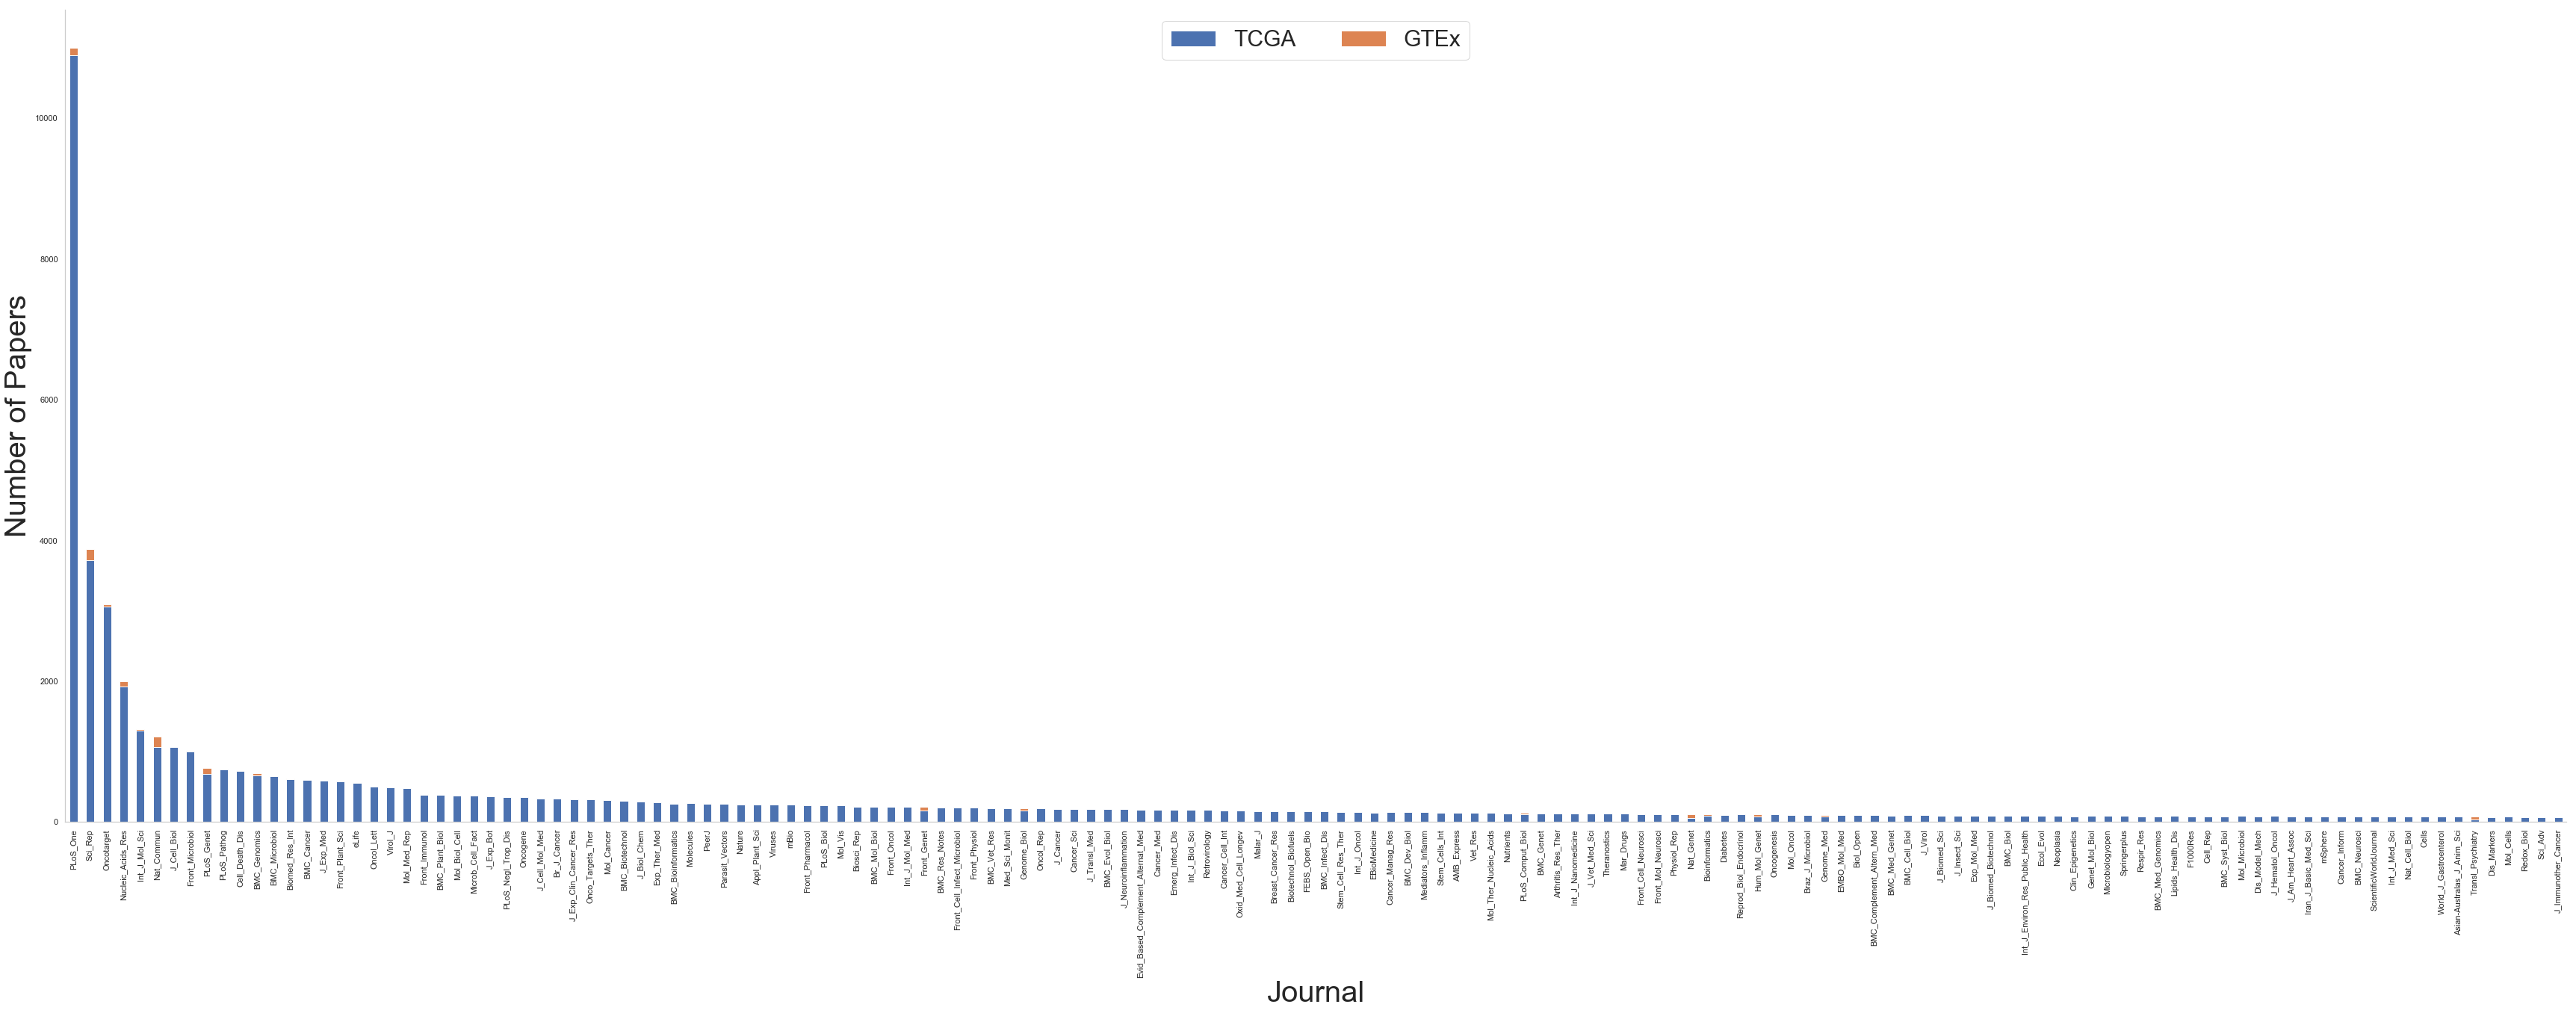

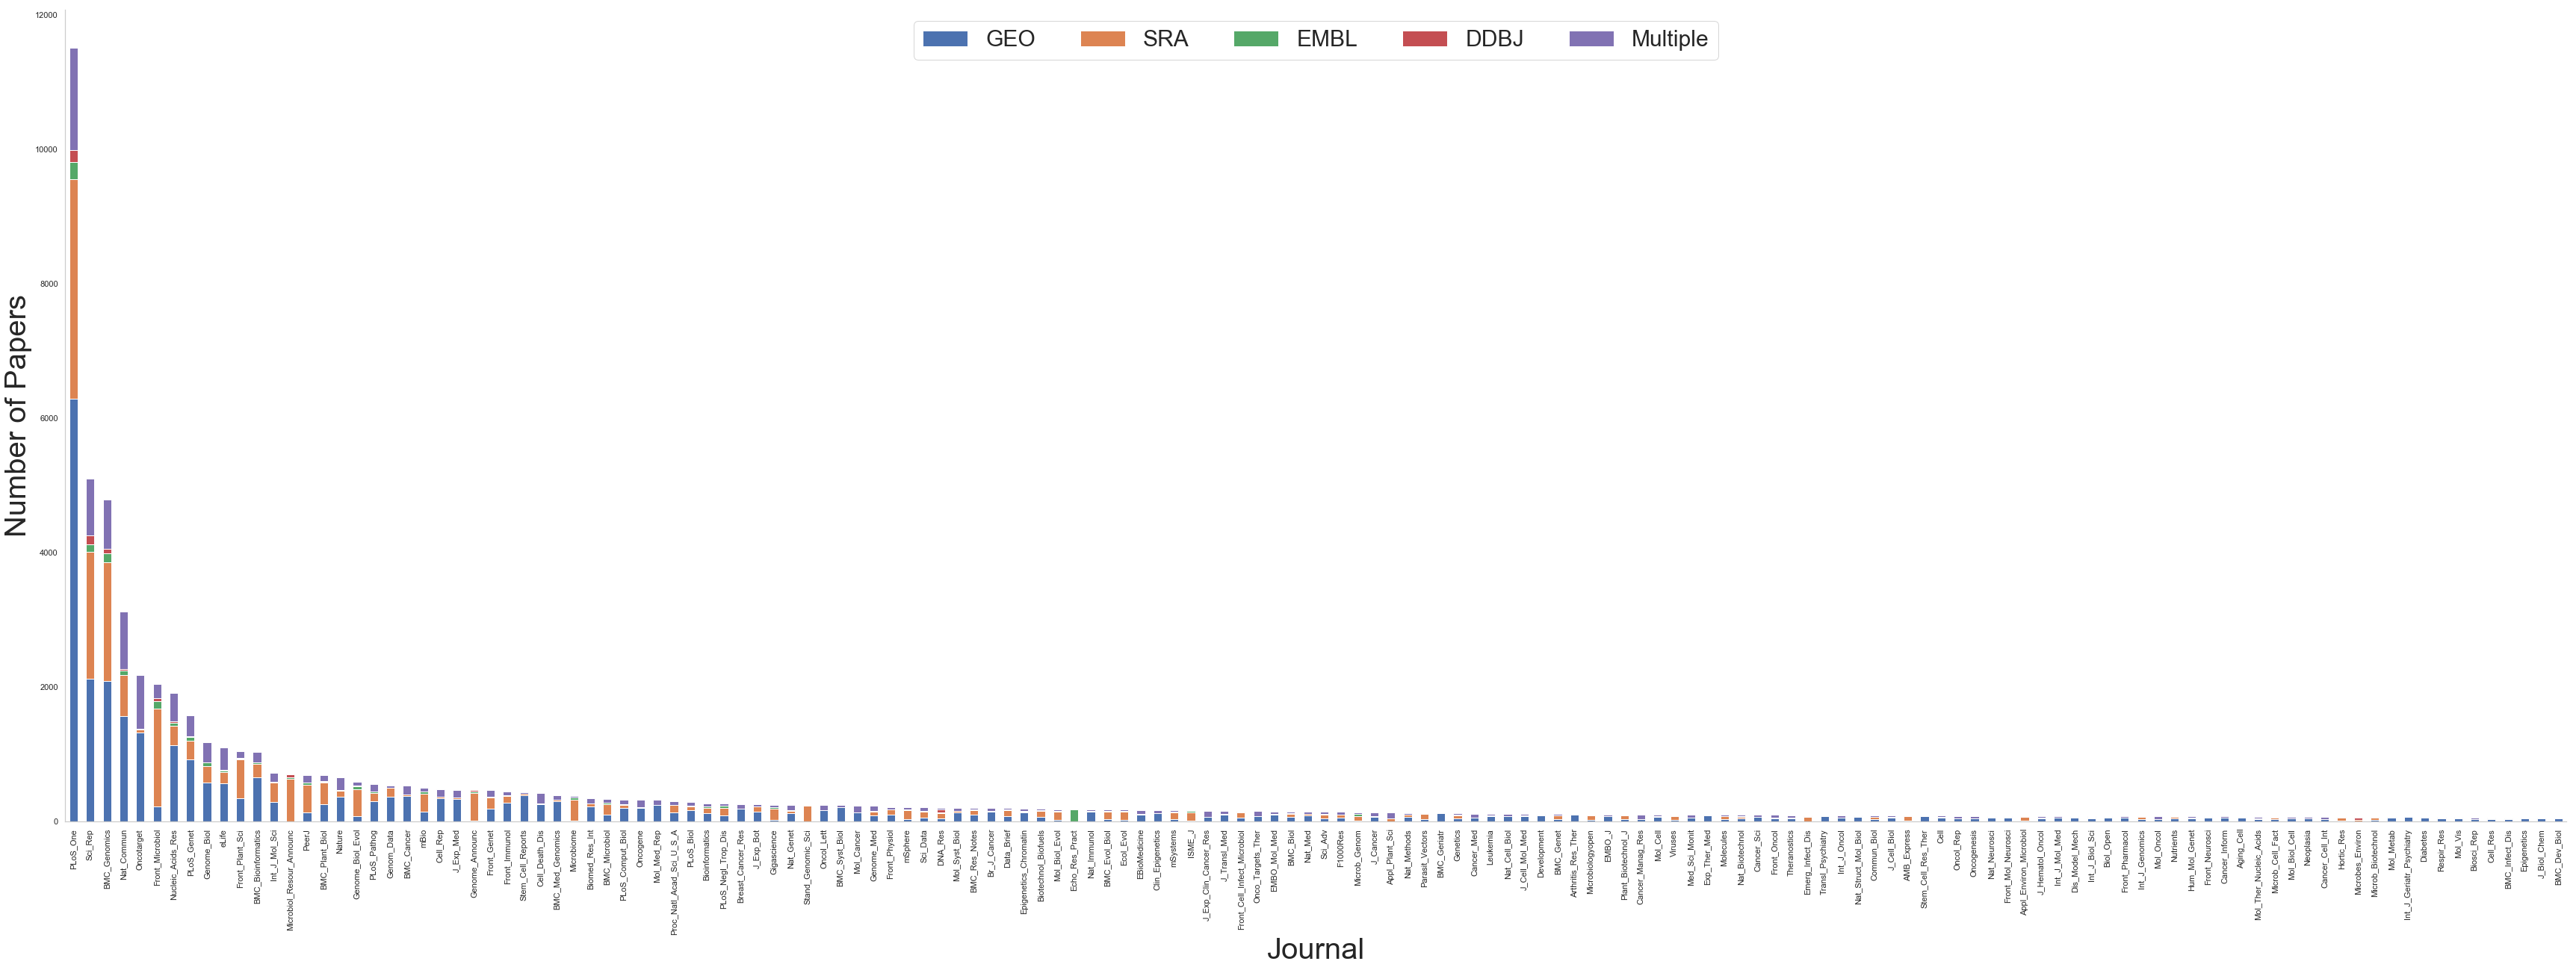

In [18]:
## PLOT TWO STACKED BARCHARTS ##

# make the colors look nice
sns.set(style = 'whitegrid')
#plt.style.use('ggplot')

# create axis objects
axTCGA = dfT_TCGA.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()
axSRA = dfT_SRA.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()

# create legend objects
axTCGA.legend(loc='upper center', ncol = 2, prop={'size': 30}, labels=['TCGA', 'GTEx'])
axTCGA.grid(False)
axSRA.legend(loc='upper center', ncol = 5, prop={'size': 30}, labels=['GEO', 'SRA', 'EMBL', 'DDBJ', 'Multiple'])

# turn grid lines off
axTCGA.grid(False)
axSRA.grid(False)

# set axis labels
axSRA.set_xlabel("Journal", fontsize=40)
axSRA.set_ylabel("Number of Papers", fontsize=40)
axTCGA.set_xlabel("Journal", fontsize=40)
axTCGA.set_ylabel("Number of Papers", fontsize=40)

# create figure objects
graphTCGA = axTCGA.get_figure()
graphSRA = axSRA.get_figure()

# write to .png files
graphTCGA.savefig('repo_absolute_TCGA.png', dpi = 200, bbox_inches = 'tight')
graphSRA.savefig('repo_absolute_SRA.png', dpi = 200, bbox_inches = 'tight')